# ANALISI DATASET DIABETES 

La seguente analisi del dataset "diabetes" di scikit-learn ha lo scopo di individuare un modello di apprendimento in grado di predire il livello di progressione della malattia dopo un anno. Si intende partire dai dati relativi alle 10 variabili misurate sui pazienti per selezionare un modello di regressione e valutarne la performance.

In [15]:
# importo i dati standardizzati e visualizzo le caratteristiche del dataset
from sklearn import datasets

diabetes = datasets.load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [16]:
# visualizzo la struttura del dataset attraverso un DataFrame
import pandas as pd

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [17]:
# controllo le tipologie di dati e la presenza di valori mancanti
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [18]:
# contollo gli ordini di grandezza delle features
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [19]:
# controllo la presenza di dati ripetuti
df.duplicated().sum()

0

In [20]:
# separo i dati tra train e test (90% del totale per massimizzare i risultati dei modelli)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.9, random_state=0)

In [21]:
# seleziono alcuni modelli di regressione e valuto per ognuno i risultati sul training e test set usando diversi indicatori
# il miglior modello sul training set risulta essere GradientBoostingRegressor
# il miglior modello sul test set risulta essere BayesianRidge
models = [LinearRegression(), RandomForestRegressor(), SVR(), Ridge(), Lasso(), GradientBoostingRegressor(), KNeighborsRegressor(), BayesianRidge()]

for model in models:
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    n_train = len(y_train)
    p_train = X_train.shape[1]
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
    
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    n_test = len(y_test)
    p_test = X_test.shape[1]
    adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

    print(f'{model.__class__.__name__}:')
    
    print('Training set:')
    print(f'  MSE: {mse_train:.2f}')
    print(f'  RMSE: {rmse_train:.2f}')
    print(f'  MAE: {mae_train:.2f}')
    print(f'  R-squared: {r2_train:.2f}')
    print(f'  Adjusted R-squared: {adj_r2_train:.2f}')
    
    print('Testing set:')
    print(f'  MSE: {mse_test:.2f}')
    print(f'  RMSE: {rmse_test:.2f}')
    print(f'  MAE: {mae_test:.2f}')
    print(f'  R-squared: {r2_test:.2f}')
    print(f'  Adjusted R-squared: {adj_r2_test:.2f}')


LinearRegression:
Training set:
  MSE: 2471.77
  RMSE: 49.72
  MAE: 38.15
  R-squared: 0.64
  Adjusted R-squared: 0.53
Testing set:
  MSE: 3518.98
  RMSE: 59.32
  MAE: 46.83
  R-squared: 0.40
  Adjusted R-squared: 0.38
RandomForestRegressor:
Training set:
  MSE: 551.04
  RMSE: 23.47
  MAE: 16.91
  R-squared: 0.92
  Adjusted R-squared: 0.90
Testing set:
  MSE: 3949.38
  RMSE: 62.84
  MAE: 49.54
  R-squared: 0.32
  Adjusted R-squared: 0.30
SVR:
Training set:
  MSE: 7196.60
  RMSE: 84.83
  MAE: 68.61
  R-squared: -0.04
  Adjusted R-squared: -0.35
Testing set:
  MSE: 6103.83
  RMSE: 78.13
  MAE: 63.96
  R-squared: -0.05
  Adjusted R-squared: -0.08
Ridge:
Training set:
  MSE: 5348.94
  RMSE: 73.14
  MAE: 63.25
  R-squared: 0.23
  Adjusted R-squared: -0.01
Testing set:
  MSE: 4623.88
  RMSE: 68.00
  MAE: 58.10
  R-squared: 0.21
  Adjusted R-squared: 0.18
Lasso:
Training set:
  MSE: 3585.57
  RMSE: 59.88
  MAE: 47.21
  R-squared: 0.48
  Adjusted R-squared: 0.33
Testing set:
  MSE: 3872.34
  R

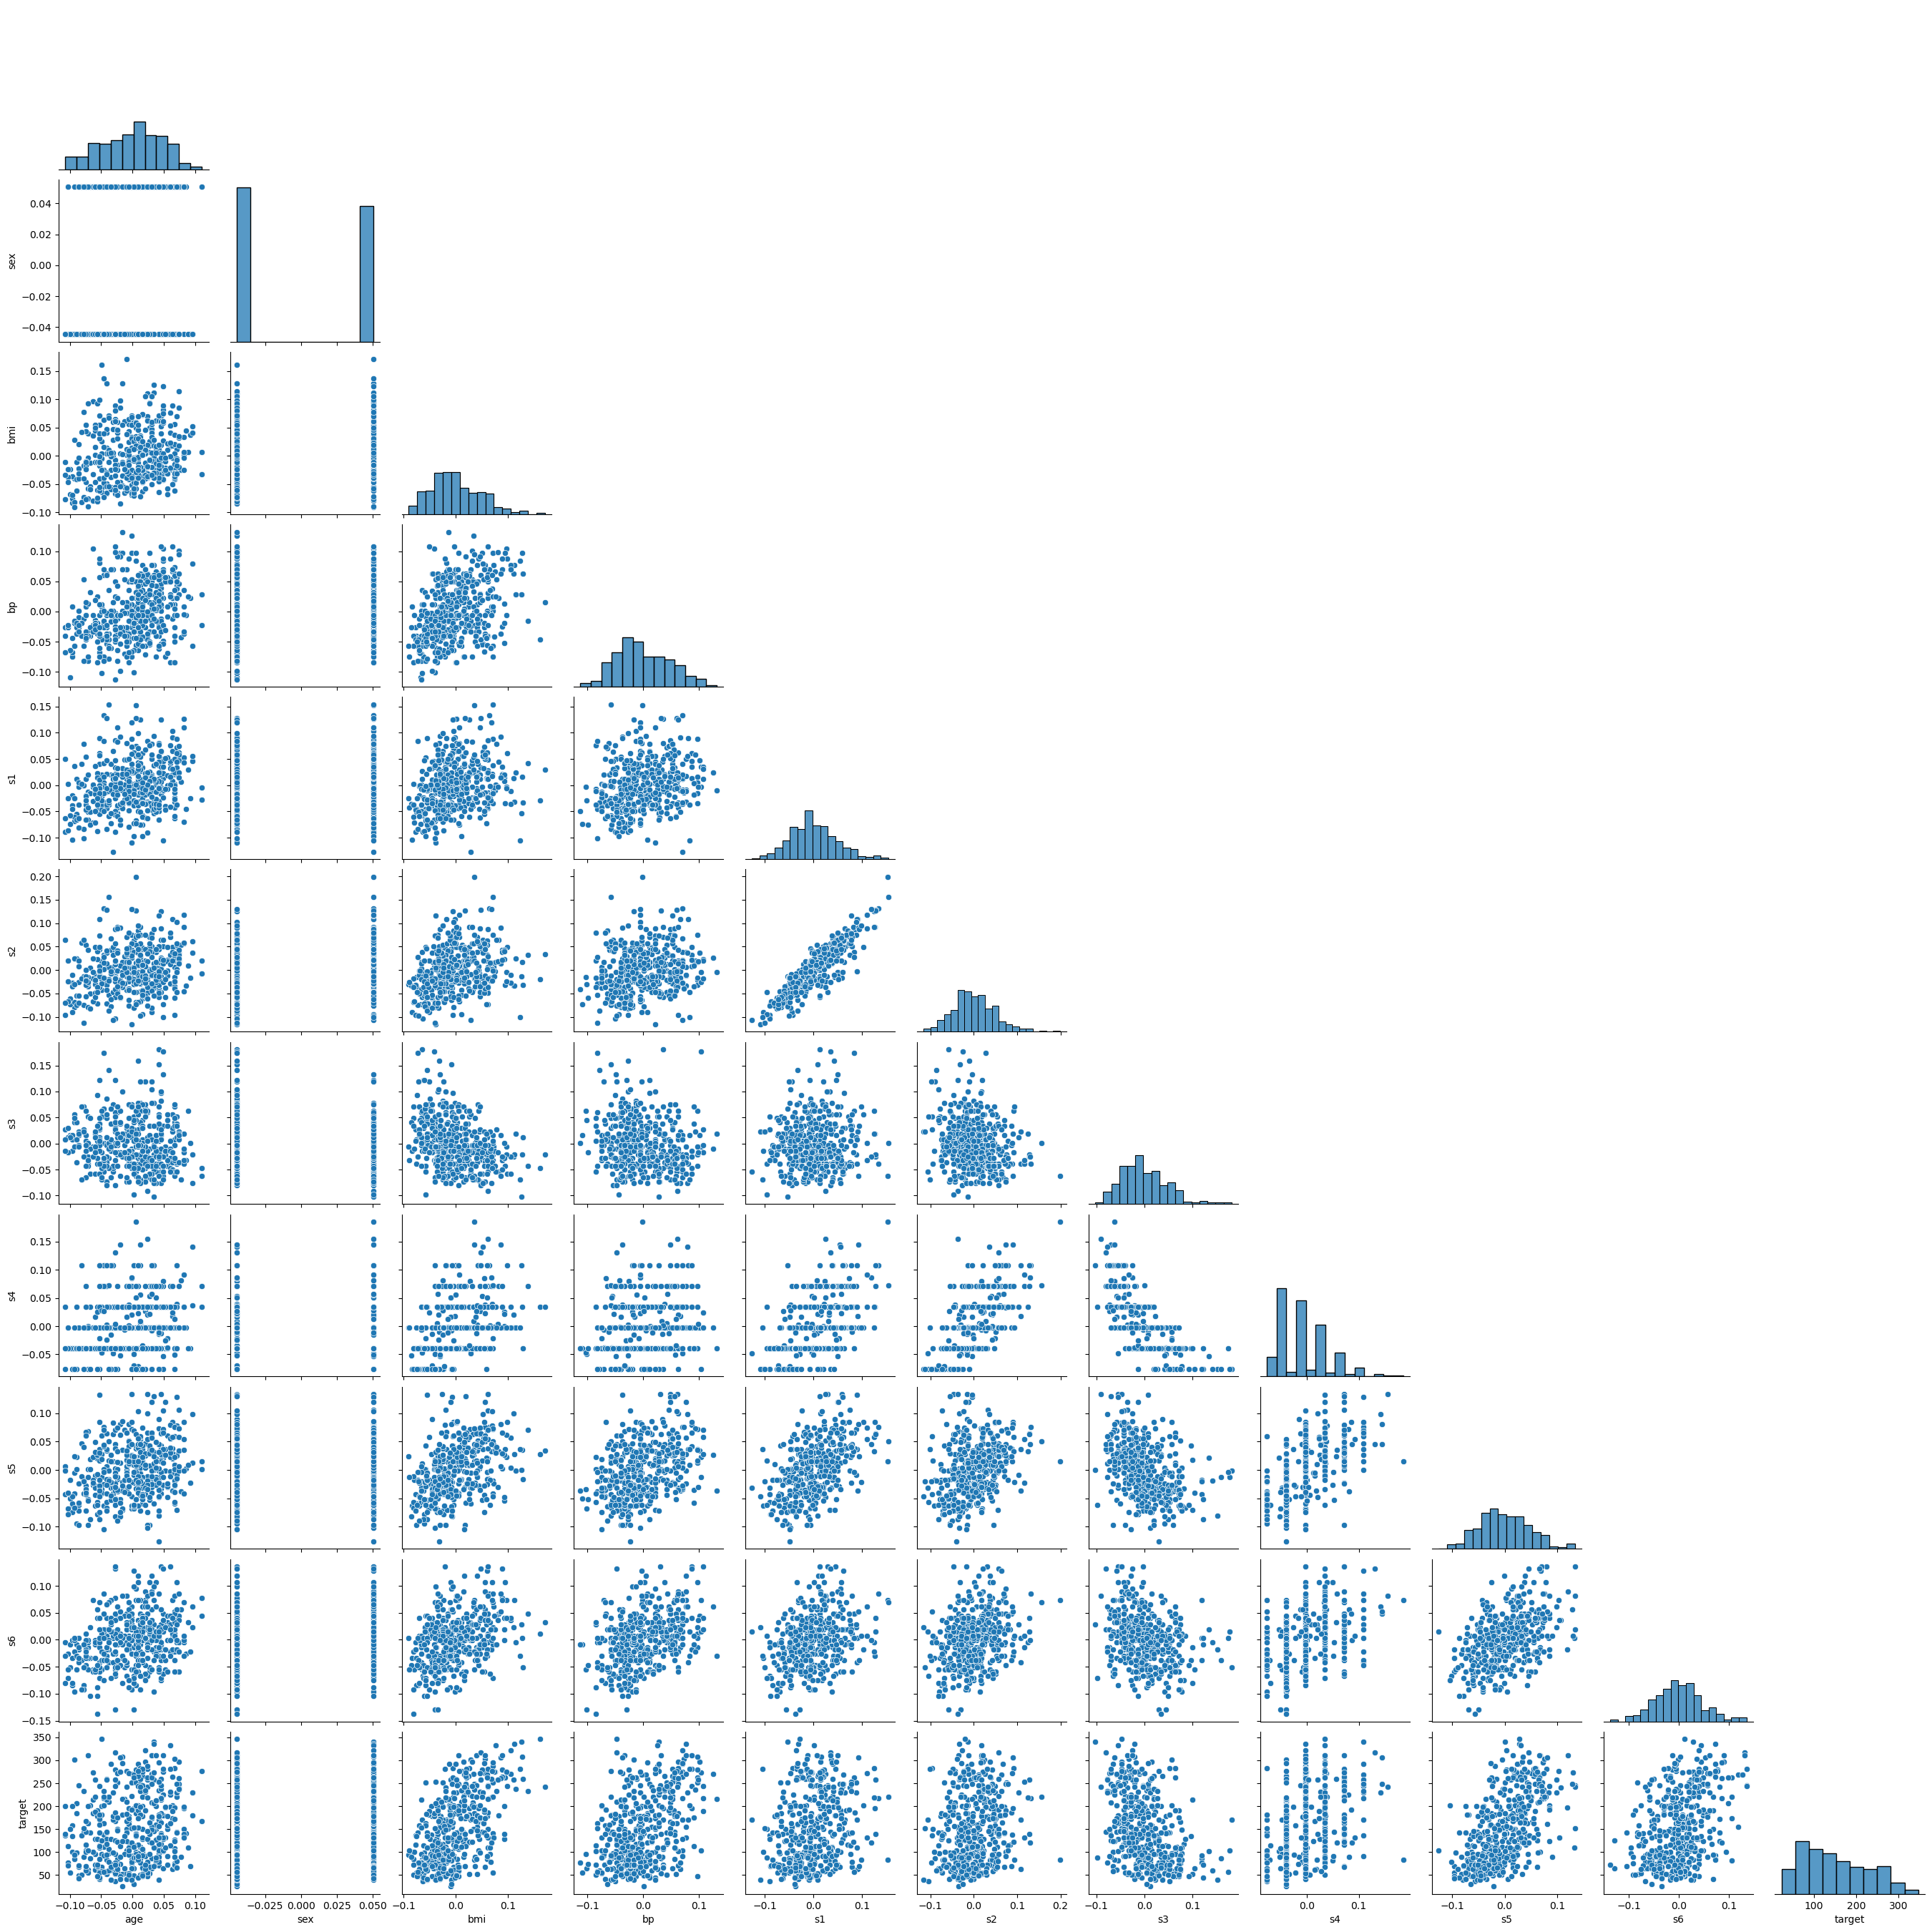

In [22]:
# visualizzo graficamente la correlazione tra le variabili del dataset
import seaborn as sns

sns.pairplot(df, corner=True)

<Axes: >

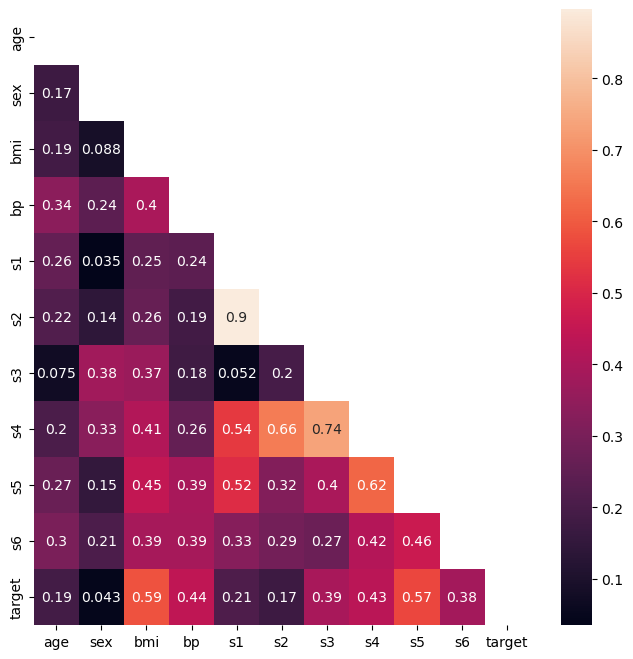

In [23]:
# visualizzo sulla heatmap i valori di correlazione lineare (in valore assoluto) tra le variabili
import matplotlib.pyplot as plt

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, mask=mask)

In [24]:
# per evitare la collinearità dovuta a due variabili altamente correlate ne elimino una
# divido nuovamente i dati in train e test
df = df.drop('s2', axis=1)

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.9, random_state=0)

In [25]:
# seleziono i due migliori modelli per il training e test set e valuto nuovamente i modelli con le nuove variabili
# non riscontro significativi peggioramenti nei risultati
models = [BayesianRidge(), GradientBoostingRegressor()]

for model in models:
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    n_train = len(y_train)
    p_train = X_train.shape[1]
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
    
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    n_test = len(y_test)
    p_test = X_test.shape[1]
    adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

    print(f'{model.__class__.__name__}:')
    
    print('Training set:')
    print(f'  MSE: {mse_train:.2f}')
    print(f'  RMSE: {rmse_train:.2f}')
    print(f'  MAE: {mae_train:.2f}')
    print(f'  R-squared: {r2_train:.2f}')
    print(f'  Adjusted R-squared: {adj_r2_train:.2f}')
    
    print('Testing set:')
    print(f'  MSE: {mse_test:.2f}')
    print(f'  RMSE: {rmse_test:.2f}')
    print(f'  MAE: {mae_test:.2f}')
    print(f'  R-squared: {r2_test:.2f}')
    print(f'  Adjusted R-squared: {adj_r2_test:.2f}')


BayesianRidge:
Training set:
  MSE: 2647.99
  RMSE: 51.46
  MAE: 40.14
  R-squared: 0.62
  Adjusted R-squared: 0.50
Testing set:
  MSE: 3081.19
  RMSE: 55.51
  MAE: 44.66
  R-squared: 0.47
  Adjusted R-squared: 0.46
GradientBoostingRegressor:
Training set:
  MSE: 1.79
  RMSE: 1.34
  MAE: 0.96
  R-squared: 1.00
  Adjusted R-squared: 1.00
Testing set:
  MSE: 4836.74
  RMSE: 69.55
  MAE: 53.67
  R-squared: 0.17
  Adjusted R-squared: 0.15


In [26]:
# proseguo l'analisi con l'ottimizzazione degli iperparametri sul miglior modello per il test set 
# visualizzo in un DataFrame i parametri di default del modello
br = BayesianRidge()

params_df = pd.DataFrame({'BayesianRidge': br.get_params()})

params_df

BayesianRidge
alpha_1            0.000001
alpha_2            0.000001
alpha_init             None
compute_score         False
copy_X                 True
fit_intercept          True
lambda_1           0.000001
lambda_2           0.000001
lambda_init            None
n_iter                  300
tol                   0.001
verbose               False

In [27]:
# utilizzo la cross-validation per validare gli iperparametri del modello
# scelgo di usare ShuffleSplit in modo che i dati siano mescolati prima di effettuare la suddivisione
# uso GridSearchCV per testare automaticamente i diversi valori degli iperparametri e selezionare i migliori
from sklearn.model_selection import GridSearchCV, ShuffleSplit

ss = ShuffleSplit(n_splits=5)

br_param_grid = {
    'n_iter': [100, 200, 300],
    'tol': [1e-3, 1e-4, 1e-5],
    'alpha_1': [1e-6, 1e-7, 1e-8],
    'alpha_2': [1e-6, 1e-7, 1e-8],
    'lambda_1': [1e-6, 1e-7, 1e-8],
    'lambda_2': [1e-6, 1e-7, 1e-8],
    'fit_intercept': [True, False],
}

br_grid_search = GridSearchCV(br, br_param_grid, cv=ss)

br_grid_search.fit(X_train, y_train)

print("BayesianRidge best parameters:")
print(br_grid_search.best_params_)

BayesianRidge best parameters:
{'alpha_1': 1e-06, 'alpha_2': 1e-08, 'fit_intercept': True, 'lambda_1': 1e-08, 'lambda_2': 1e-08, 'n_iter': 100, 'tol': 0.001}


In [28]:
# valuto i risultati del modello con i migliori parametri
# non sono presenti variazioni rilevanti
best_br = br_grid_search.best_estimator_

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print("Training set:")
    print(f"  MSE: {train_mse:.2f}")
    print(f"  RMSE: {train_rmse:.2f}")
    print(f"  MAE: {train_mae:.2f}")
    print(f"  R-squared: {train_r2:.2f}")
    print(f"  Adjusted R-squared: {train_adj_r2:.2f}")

    print("Testing set:")
    print(f"  MSE: {test_mse:.2f}")
    print(f"  RMSE: {test_rmse:.2f}")
    print(f"  MAE: {test_mae:.2f}")
    print(f"  R-squared: {test_r2:.2f}")
    print(f"  Adjusted R-squared: {test_adj_r2:.2f}")

print("BayesianRidge:")
evaluate_model(best_br, X_train, y_train, X_test, y_test)

BayesianRidge:
Training set:
  MSE: 2647.99
  RMSE: 51.46
  MAE: 40.14
  R-squared: 0.62
  Adjusted R-squared: 0.50
Testing set:
  MSE: 3081.19
  RMSE: 55.51
  MAE: 44.66
  R-squared: 0.47
  Adjusted R-squared: 0.46


In [29]:
# visualizzo con un grafico interattivo i coefficienti del modello per ogni variabile
import plotly.express as px

br_coefs = best_br.coef_

variable_names = ['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6', 'target']

fig = px.bar(x=variable_names, y=br_coefs, labels={'x':'Variable name', 'y':'Coefficient value'}, title='BayesianRidge coefficients')
fig.show()